## Hands-on exercise

<span style="color:red">**This exercise is an assignment, the submission deadline on Learn of this assignment is 25/03/2024 23:59.**</span>

In this exercise, you are required to build a regression model using the three ensemble learning methods we've learned today.

The problem to be solved is predicting the price of flights.

Please download the flight price dataset from Learn.

<span style="color:red">**[TBC]**</span> Please complete the following tasks:

- Load and pre-process the dataset
- Build and evaluate a regression model using:
    - AdaBoost
    - Gradient Boosting
    - Stacking

<span style="color:red">**Warning**</span>: Be aware of the size of the dataset, make sure:

- The scripts are executable on your device (whether your computer or Google Colab)
- The submitted jupyter notebook has been already executed and contains all the outputs.

In [7]:
# import all libraries used in this notebook here
import warnings

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.svm import SVC, SVR
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import classification_report, f1_score, mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor, StackingRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split


### Task 1 and 2

In [2]:
"""load dataset and encoding cualitative values"""
data = pd.read_csv("flight_price_dataset.csv")

data1 = data

# List of categorical columns
categorical_columns = ["airline", "departure_time",	"arrival_time", "source_city", "stops", "destination_city", "class"]

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Iterate over each categorical column and apply label encoding
for col in categorical_columns:
    data1[col] = label_encoder.fit_transform(data1[col])

# Displaying the DataFrame after label encoding
#data1.head()

In [3]:
# General information of the dataset
print("General Information of the Dataset:")
print(data.info())


General Information of the Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  int32  
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  int32  
 4   departure_time    300153 non-null  int32  
 5   stops             300153 non-null  int32  
 6   arrival_time      300153 non-null  int32  
 7   destination_city  300153 non-null  int32  
 8   class             300153 non-null  int32  
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int32(7), int64(3), object(1)
memory usage: 19.5+ MB
None


In [4]:
# Unique values in each column
print("\nUnique Values in Each Column:")
for column in data.columns:
    unique_values = data[column].unique()
    print(f"Column: {column}")
    print(f"Unique Values: {unique_values}")
    print()


Unique Values in Each Column:
Column: Unnamed: 0
Unique Values: [     0      1      2 ... 300150 300151 300152]

Column: airline
Unique Values: [4 0 5 2 3 1]

Column: flight
Unique Values: ['SG-8709' 'SG-8157' 'I5-764' ... '6E-7127' '6E-7259' 'AI-433']

Column: source_city
Unique Values: [2 5 0 4 3 1]

Column: departure_time
Unique Values: [2 1 4 0 5 3]

Column: stops
Unique Values: [2 0 1]

Column: arrival_time
Unique Values: [5 4 1 0 2 3]

Column: destination_city
Unique Values: [5 0 4 3 1 2]

Column: class
Unique Values: [1 0]

Column: duration
Unique Values: [ 2.17  2.33  2.25  2.08 12.25 16.33 11.75 14.5  15.67  3.75  2.5   5.83
  8.    6.   14.67 16.17 18.   23.17 24.17  8.83  4.5  15.25 11.   19.08
 22.83 26.42 17.75 19.58 26.67 15.17 20.83 11.42 22.25 26.   21.75  3.83
  4.42  7.67  8.33 10.42 23.75 19.5   6.5  12.42 21.08 28.17 28.25  9.25
 17.92  7.08 13.83  7.58 15.83 24.42  4.17  4.25  5.08 29.33 17.   27.17
 24.75  5.75 12.75 13.75 17.83  5.5  23.83  5.   26.5  12.83  8.9

In [5]:
""" Split the data into features (X) and target (y)"""

feature_columns = ["airline", "departure_time",	"arrival_time", "source_city", "stops", "destination_city", "class","duration","days_left"]
feature_df = data1[feature_columns]
target_df = data1["price"]


# display the first five rows of the features
feature_df.head()


,airline,departure_time,arrival_time,source_city,stops,destination_city,class,duration,days_left
0,4,2,5,2,2,5,1,2.17,1
1,4,1,4,2,2,5,1,2.33,1
2,0,1,1,2,2,5,1,2.17,1
3,5,4,0,2,2,5,1,2.25,1
4,5,4,4,2,2,5,1,2.33,1


In [6]:
"""train test split"""
X_train, X_test, y_train, y_test = train_test_split(
    feature_df.values, # call `.values` to convert the feature from pd.DataFrame to np.array
    target_df.values, # ca;; `.values` to convert the target from pd.Series to np.array
    train_size = 0.7, # 70% for training, 30% for test
    random_state = 0 # controls the shuffling, set to zero for reproduciblillity
)

### Task 2. AdaBoost Regressor

You need to build and evaluate a regression model using AdaBoost algorithm.

<span style="color:red">**[TBC]**</span> Please complete the following tasks:

- Hyper-parameter-tuning through cross validation
- Evaluate the performance on test dataset
    - Calculate RMSE and R2 score
    - Visualize the prediction results of the test dataset

In [8]:
# AdaBoost Regressor
param_grid = {
    'n_estimators': [40, 50],  # Number of estimators (weak learners)
    'learning_rate': [0.1, 0.3, 0.5],  # Learning rate
}
ada_boost = AdaBoostRegressor(random_state=0)
grid_search = GridSearchCV(ada_boost, param_grid, cv=5, scoring='neg_root_mean_squared_error', refit=True)
grid_search.fit(X_train, y_train)
best_ada_boost = grid_search.best_estimator_

In [9]:
best_ada_boost.fit(X_train, y_train)

AdaBoostRegressor(learning_rate=0.3, n_estimators=40, random_state=0)

In [10]:
#Evaluate Performance using RMSE and R2 score
y_pred_ada = best_ada_boost.predict(X_test)
rmse = mean_squared_error(y_test, y_pred_ada, squared=False)
r2 = r2_score(y_test, y_pred_ada)
print("RMSE:", rmse)
print("R2 Score:", r2)

RMSE: 5736.9291332884995
R2 Score: 0.93614889563899


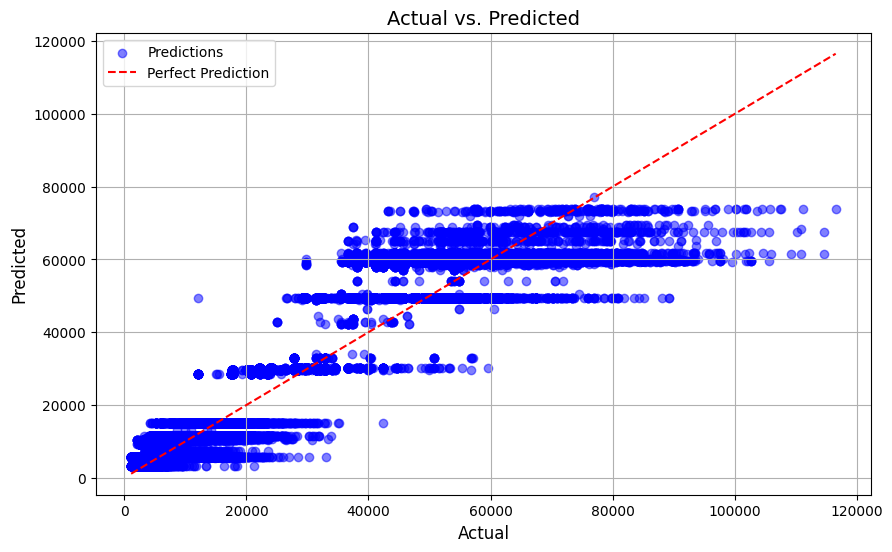

In [11]:
# Assuming y_test and y_pred_ada are defined

plt.figure(figsize=(10, 6))

# Scatter plot for actual vs predicted
plt.scatter(y_test, y_pred_ada, color='blue', alpha=0.5, label='Predictions')

# Plot a line of perfect prediction
min_val, max_val = np.min([y_test, y_pred_ada]), np.max([y_test, y_pred_ada])
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Perfect Prediction')

# Enhancements
plt.xlabel('Actual', fontsize=12)
plt.ylabel('Predicted', fontsize=12)
plt.title('Actual vs. Predicted', fontsize=14)
plt.grid(True)
plt.legend()
plt.tick_params(axis='both', which='major', labelsize=10)

plt.show()


### Task 3. Gradient Boosting Regressor

You need to build and evaluate a regression model using Gradient Boosting algorithm.

<span style="color:red">**[TBC]**</span> Please complete the following tasks:

- Hyper-parameter-tuning through cross validation
- Evaluate the performance on test dataset
    - Calculate RMSE and R2 score
    - Visualize the prediction results of the test dataset

In [12]:
# Gradient Boosting Regressor
param_grid = {
    'learning_rate': [0.1, 0.7, 1],
    'n_estimators': [25, 50],
    # 'n_iter_no_change': [None, 1, 5, 10]
}
gradient_boost = GradientBoostingRegressor(random_state=0)
grid_search = GridSearchCV(gradient_boost, param_grid, cv=5, scoring='neg_root_mean_squared_error')
grid_search.fit(X_train, y_train)
best_gradient_boost = grid_search.best_estimator_

In [13]:
# Train the model
best_gradient_boost.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=1, n_estimators=50, random_state=0)

In [14]:
#Evaluate Performance using RMSE and R2 score
y_pred_gradient = best_gradient_boost.predict(X_test)
rmse = mean_squared_error(y_test, y_pred_gradient, squared=False)
r2 = r2_score(y_test, y_pred_gradient)
print("RMSE:", rmse)
print("R2 Score:", r2)

RMSE: 4685.933856393117
R2 Score: 0.9574007698194532


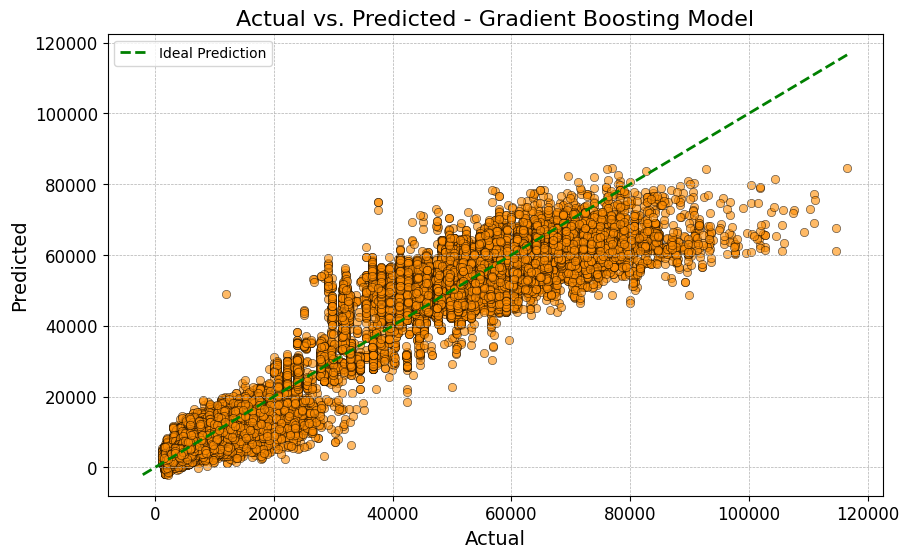

In [15]:
plt.figure(figsize=(10, 6))

# Improved scatter plot for actual vs. predicted values
plt.scatter(y_test, y_pred_gradient, color='darkorange', alpha=0.6, edgecolor='black', linewidth=0.5)

# Diagonal line for perfect predictions
min_val, max_val = min(min(y_test), min(y_pred_gradient)), max(max(y_test), max(y_pred_gradient))
plt.plot([min_val, max_val], [min_val, max_val], color='green', linestyle='--', linewidth=2, label='Ideal Prediction')

# Customizations for better readability and aesthetics
plt.xlabel('Actual', fontsize=14)
plt.ylabel('Predicted', fontsize=14)
plt.title('Actual vs. Predicted - Gradient Boosting Model', fontsize=16)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.tick_params(axis='both', which='major', labelsize=12)

plt.show()

### Task 4. Stacking Regressor

You need to build and evaluate a regression model using Stacking algorithm.

<span style="color:red">**[TBC]**</span> Please complete the following tasks:

- Train a stacking regressor on training dataset
    - Select a list of base learner
        - Choose proper regression algorithms
        - If the algorithm needs specific pre-processing steps, embed the steps as a pipeline
    - Select the meta-learner
        - Choose proper regression algorithm
- Evaluate the performance on test dataset
    - Calculate RMSE and R2 score
    - Visualize the prediction results of the test dataset

In [16]:
# Stacking Regressor
# declare a list of base estimators to be stacked together
estimators = [
    ('decision tree', DecisionTreeRegressor(
        max_depth = 5,
        random_state = 0
    )),
    ('KNN', Pipeline([
        ('standard scaler', StandardScaler()),
        ('knn', KNeighborsRegressor())
    ])),
    ('SVC', Pipeline([
        ('standard scaler', StandardScaler()),
        ('svc', SVR(max_iter=200))
    ]))
]

In [17]:
clf_flight = StackingRegressor(
    estimators = estimators,
    final_estimator = LinearRegression(),
    n_jobs =-1,
    verbose = 10
)

In [18]:
# fit the model to the training dataset
clf_flight.fit(X_train, y_train)

StackingRegressor(estimators=[('decision tree',
                               DecisionTreeRegressor(max_depth=5,
                                                     random_state=0)),
                              ('KNN',
                               Pipeline(steps=[('standard scaler',
                                                StandardScaler()),
                                               ('knn',
                                                KNeighborsRegressor())])),
                              ('SVC',
                               Pipeline(steps=[('standard scaler',
                                                StandardScaler()),
                                               ('svc', SVR(max_iter=200))]))],
                  final_estimator=LinearRegression(), n_jobs=-1, verbose=10)

In [19]:
#Evaluate Performance using RMSE and R2 score
y_pred_stacking = clf_flight.predict(X_test)
rmse = mean_squared_error(y_test, y_pred_stacking, squared=False)
r2 = r2_score(y_test, y_pred_stacking)
print("RMSE:", rmse)
print("R2 Score:", r2)

RMSE: 3703.8987916431383
R2 Score: 0.9733849267920806


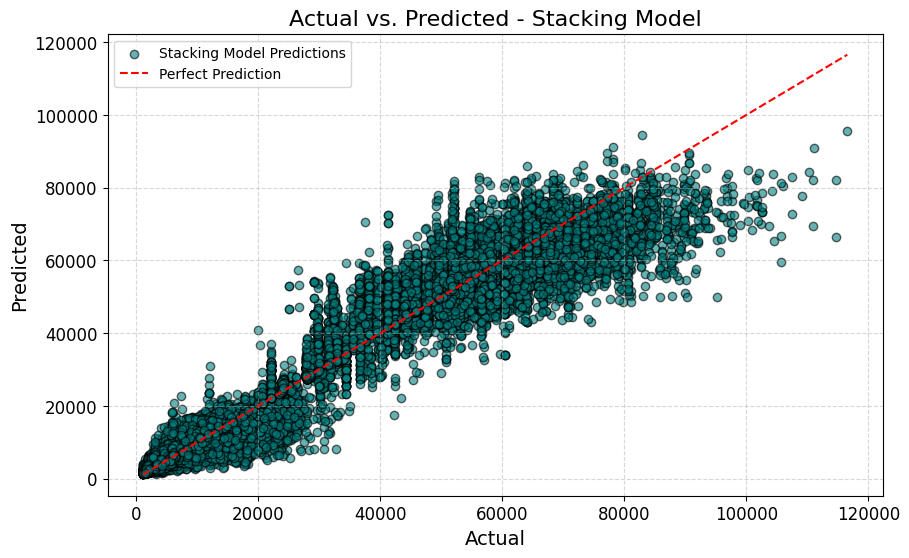

In [20]:
plt.figure(figsize=(10, 6))

# Scatter plot for actual vs. predicted
plt.scatter(y_test, y_pred_stacking, alpha=0.6, edgecolor='black', color='teal', label='Stacking Model Predictions')

# Perfect prediction line
min_val, max_val = np.min([y_test.min(), y_pred_stacking.min()]), np.max([y_test.max(), y_pred_stacking.max()])
plt.plot([min_val, max_val], [min_val, max_val], 'r--', label='Perfect Prediction')

# Enhancements for readability
plt.xlabel('Actual', fontsize=14)
plt.ylabel('Predicted', fontsize=14)
plt.title('Actual vs. Predicted - Stacking Model', fontsize=16)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tick_params(axis='both', which='major', labelsize=12)

plt.show()